In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
csv_data = pd.read_csv("dataset2.csv")
data_partial1 = pd.DataFrame(csv_data, columns=['x', 'y', 'label'])
data_partial = data_partial1.iloc[np.random.permutation(len(data_partial1))]
Lim=round(len(data_partial)*0.8)
P1=data_partial.iloc[:Lim,:];
P2=data_partial.iloc[Lim:,:];

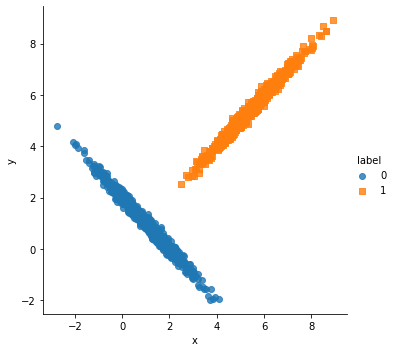

In [138]:
sns.lmplot(x='x', y='y', data=P1, hue='label', fit_reg=False, markers=["o", "s"])

In [139]:
x1 = P1.iloc[:, 0].values
y1 = P1.iloc[:, 1].values
label = P1.iloc[:, 2].values
#label = np.where(label == 0, -1, 1)

In [140]:
x2 = P2.iloc[:, 0].values
y2 = P2.iloc[:, 1].values
label2 = P2.iloc[:, 2].values
#label2 = np.where(label2 == 0, -1, 1)

In [141]:
class Perceptron(object):
  def Plotpoly(self,weight):
    delta = 0.01
    xrange = np.arange(-2.0, 8.0, delta)
    yrange = np.arange(-2.0, 8.0, delta)
    x, y = np.meshgrid(xrange, yrange)
    equation = weight[1]*x + weight[2]*y + weight[0]
    return equation, x, y

  def TestPredict(self,x,y,label,weight):
    errors=0
    predict=0
    for i in range(len(x)):
      ac=x[i]*weight[1]+y[i]*weight[2] + weight[0]
      if ac>=0.0:
        predict=1
      elif ac<0.0:
        predict=0
      errors += int(label[i]-predict != 0.0)
    return errors

  def TrainPredict(self,eta,x,y,label,weight):
    errors=0
    for i in range(len(x)):
      ac=x[i]*weight[1]+y[i]*weight[2] + weight[0]
      if ac>=0.0:
        predict=1
      elif ac<0.0:
        predict=0
      update = eta * (label[i]-predict)
      weight[1] += update * x[i]
      weight[2] += update * y[i]
      weight[0] += update
      errors += int(update != 0.0)
    return errors,weight

  def fit(self,eta,Epoch,x,y,label,x2,y2,label2):
    weight = [random.uniform(-4.0, 4.0) for _ in range(3)]
    errorsTR = []
    errorsTS = []
    Train_errors=0
    Test_errors=0
    df = pd.DataFrame(data={'x': x, 'y': y, 'label': label})
    x = np.linspace(-3,8)
    for _ in range(Epoch):
      errorsTR.append(Train_errors)
      errorsTS.append(Test_errors)
      Train_errors=0
      Test_errors=0
      sns.lmplot(x='x', y='y', data=df, hue='label')
      eq, x, y=self.Plotpoly(weight)
      plt.contour(x, y, eq, [0])
      plt.grid()
      plt.show()
      Test_errors= self.TestPredict(x2,y2,label2,weight)
      Train_errors,weight=self.TrainPredict(eta,x1,y1,label,weight)
    fig, axs = plt.subplots(1,2)
    fig.suptitle('Train Error Rate In Each Epoch')
    axs[0].plot(errorsTR)
    axs[0].set_title('Evaluation Error')
    axs[1].plot(errorsTS)
    axs[1].set_title('Test Error Error')
    

In [142]:
model=Perceptron()

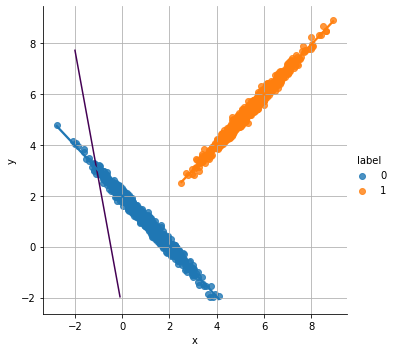

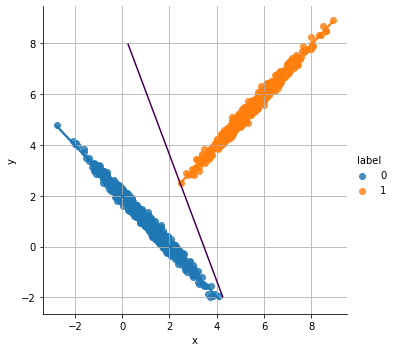

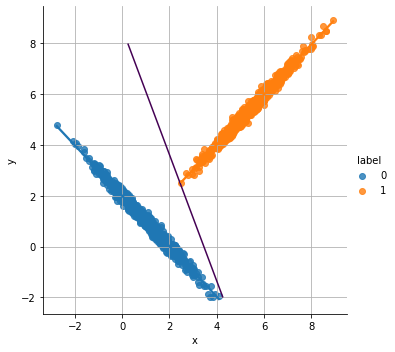

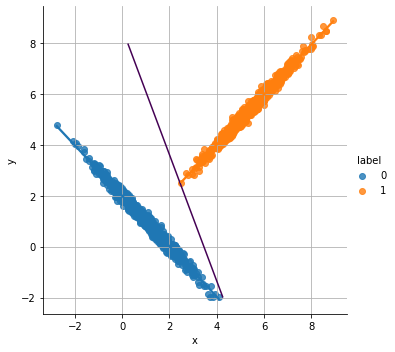

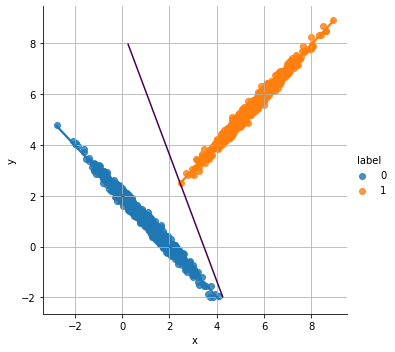

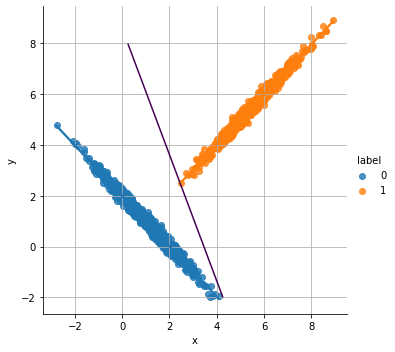

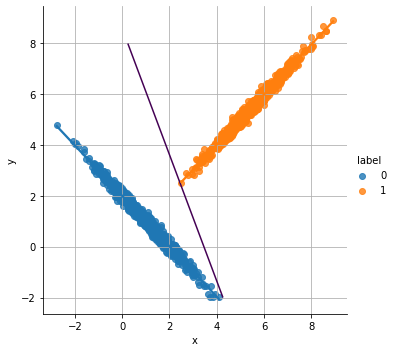

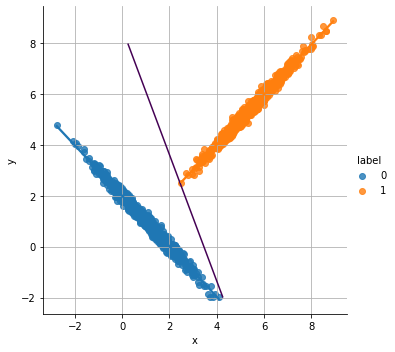

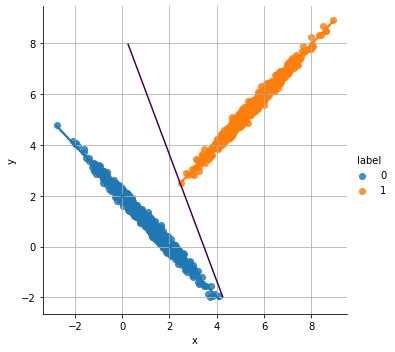

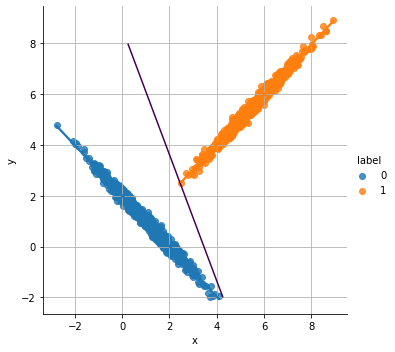

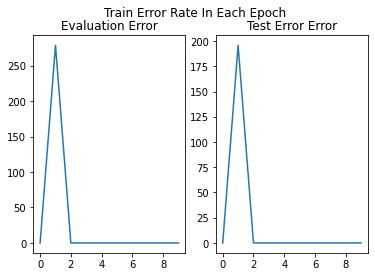

In [143]:
model.fit(0.01,10,x1,y1,label,x2,y2,label2)